In [8]:
# Load Dataset 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [9]:
# Rename Features

# Load dataset
diabetes_data = load_diabetes(as_frame=True)
df = diabetes_data.frame

# Rename columns (replace s1 to s6 with actual feature names)
df.rename(columns={'s1': 'Total Cholesterol (TC)', 's2': 'Low-Density Lipoproteins (LDL)', 
                   's3': 'High-Density Lipoproteins (HDL)', 's4': 'Total Cholesterol / HDL Ratio (TCH)', 
                   's5': 'Log of Serum Triglycerides Level (LTG)', 's6': 'Blood Sugar Level (GLU)'}, inplace=True)

# Display feature names and first 20 rows
print(diabetes_data.feature_names)
print(df.head(20))

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
         age       sex       bmi        bp  Total Cholesterol (TC)  \
0   0.038076  0.050680  0.061696  0.021872               -0.044223   
1  -0.001882 -0.044642 -0.051474 -0.026328               -0.008449   
2   0.085299  0.050680  0.044451 -0.005670               -0.045599   
3  -0.089063 -0.044642 -0.011595 -0.036656                0.012191   
4   0.005383 -0.044642 -0.036385  0.021872                0.003935   
5  -0.092695 -0.044642 -0.040696 -0.019442               -0.068991   
6  -0.045472  0.050680 -0.047163 -0.015999               -0.040096   
7   0.063504  0.050680 -0.001895  0.066629                0.090620   
8   0.041708  0.050680  0.061696 -0.040099               -0.013953   
9  -0.070900 -0.044642  0.039062 -0.033213               -0.012577   
10 -0.096328 -0.044642 -0.083808  0.008101               -0.103389   
11  0.027178  0.050680  0.017506 -0.033213               -0.007073   
12  0.016281 -0.044642 -0.

Total no of missing values
age                                       0
sex                                       0
bmi                                       0
bp                                        0
Total Cholesterol (TC)                    0
Low-Density Lipoproteins (LDL)            0
High-Density Lipoproteins (HDL)           0
Total Cholesterol / HDL Ratio (TCH)       0
Log of Serum Triglycerides Level (LTG)    0
Blood Sugar Level (GLU)                   0
target                                    0
dtype: int64


C:\Users\RUBAN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


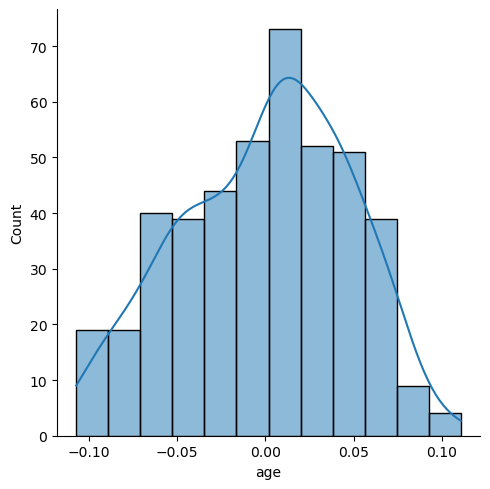

In [10]:
#  Exploratory Data Analysis (EDA)
# Check for missing values
print("Total no of missing values")
print(df.isnull().sum())

# Visualize age distribution
sns.displot(df['age'], kde=True)
plt.show()

In [11]:
#  Feature Selection & Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select features and target variable
X = df.drop(columns=['target'])
y = df['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
# Model Development (Linear Regression)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")

Cross-validation scores: [0.54760189 0.36123934 0.50481226 0.61773622 0.21489265]


Mean Squared Error: 2900.193628493482, R2 Score: 0.45260276297191937


C:\Users\RUBAN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


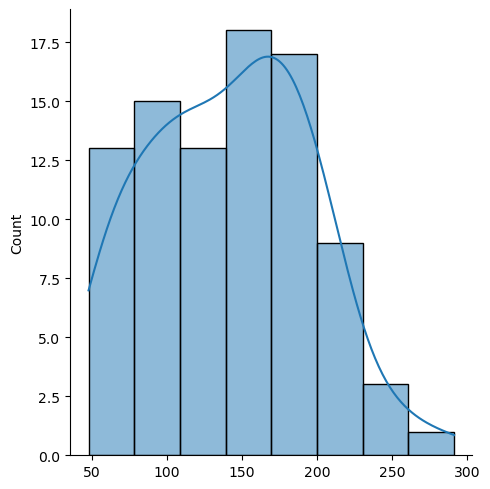

In [13]:
#  Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}, R2 Score: {r2}")

# Visualize predictions
sns.displot(y_pred, kde=True)
plt.show()

In [14]:
# Select a random row from the dataset as the custom input
random_sample = df.sample(n=1, random_state=100)  # You can change random_state for different samples

# Remove the target column (since we are predicting it)
custom_input = random_sample.drop(columns=['target'])

# Standardize the sample input (use the same scaler trained earlier)
custom_input_scaled = scaler.transform(custom_input)

# Make prediction
custom_prediction = model.predict(custom_input_scaled)

# Define threshold for diabetes classification
threshold = 140  # Adjust based on dataset insights

# Classify as diabetic or not
diagnosis = "Diabetic" if custom_prediction[0] > threshold else "Not Diabetic"

# Print custom input features and prediction
print(f"Custom Input Features:\n{custom_input}")
print(f"Predicted Diabetes Indicator: {custom_prediction[0]}")
print(f"Diagnosis: {diagnosis}")

# # Define threshold for diabetes classification
# threshold = 140  # Adjust based on dataset insights

# # Classify as diabetic or not
# diagnosis = "Diabetic" if custom_prediction[0] > threshold else "Not Diabetic"

# print(f"Predicted Diabetes Indicator: {custom_prediction[0]}")
# print(f"Diagnosis: {diagnosis}")

Custom Input Features:
          age       sex       bmi       bp  Total Cholesterol (TC)  \
419 -0.020045 -0.044642 -0.054707 -0.05387               -0.066239   

     Low-Density Lipoproteins (LDL)  High-Density Lipoproteins (HDL)  \
419                       -0.057367                         0.011824   

     Total Cholesterol / HDL Ratio (TCH)  \
419                            -0.039493   

     Log of Serum Triglycerides Level (LTG)  Blood Sugar Level (GLU)  
419                               -0.074093                 -0.00522  
Predicted Diabetes Indicator: 81.22046257913762
Diagnosis: Not Diabetic
